In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('C:/Walmart_Forecast/datas/train.csv')
stores = pd.read_csv('C:/Walmart_Forecast/datas/stores.csv')
features = pd.read_csv('C:/Walmart_Forecast/datas/features.csv')

# # Display basic information about the datasets
# print(train.info())
# print(stores.info())
# print(features.info())


# Show the first few rows of each dataset
print(train.head())
print(stores.head())
print(features.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         

## Data Preprocessing and Merging


In [3]:
# Merge train with stores

train_merged = pd.merge(train, stores, on = 'Store', how='left')
# on='stores': This specifies that the merge should be done based on the column named 'stores' that exists in both DataFrames.
# how='left': This specifies the type of merge to perform. A left join (or left merge) keeps all the rows from the train DataFrame and adds matching rows from the stores DataFrame. If there is no match, the result will have NaN for columns from the stores DataFrame. Just like sql left join I guess.

# Merge with features
train_full_merged = pd.merge(train_merged, features, on=['Store', 'Date'], how='left')
# Convert Date to datetime
# This allows you to perform various date-related operations, such as filtering by date range, extracting specific components (like year, month, day), and more.
train_full_merged['Date'] = pd.to_datetime(train_full_merged['Date'])
# Sort by Date
train_full_merged = train_full_merged.sort_values('Date')
train_full_merged









,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False


## EDA (Exploratory Data Analysis)


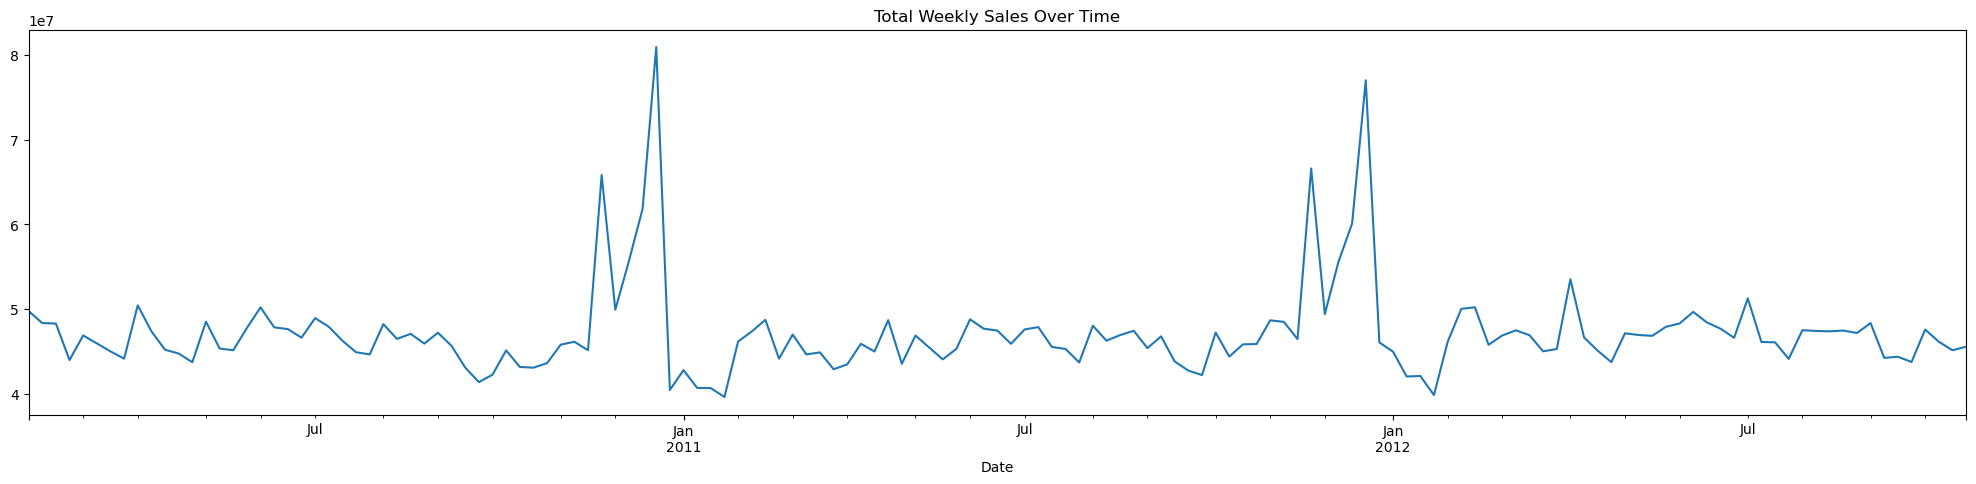

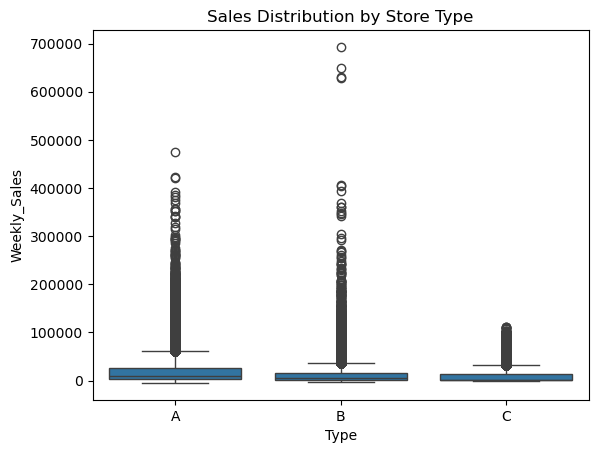

ValueError: could not convert string to float: 'A'

In [11]:
# Plot total sales over time?
plt.figure(figsize=(25,5))
train_full_merged.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.show()

# Analyze sales by store type
sns.boxplot(x='Type', y='Weekly_Sales', data = train_full_merged)
plt.title('Sales Distribution by Store Type')
plt.show()


Line graph : The y-axis in the graph represents the total weekly sales, but the specific unit of measurement is not indicated in the image. The numerical values on the y-axis range from 0 to 7, with increments of 1. To determine the exact amount of sales, you would need to know what each increment on the y-axis represents (e.g., thousands of units sold, revenue in dollars).


BoxPlot:- 
Store Type A:
Median Sales: Around 200,000.
IQR: The box shows the spread of sales data around the median.
Outliers: There are several outliers extending close to 700,000, indicating some weeks had exceptionally high sales.
Store Type B:
Median Sales: Slightly higher than Store Type A.
IQR: The spread of sales is similar to Store Type A but with fewer outliers.
Store Type C:
Median Sales: Much lower compared to Store Types A and B.
IQR: The data points are more concentrated, indicating less variability in sales.

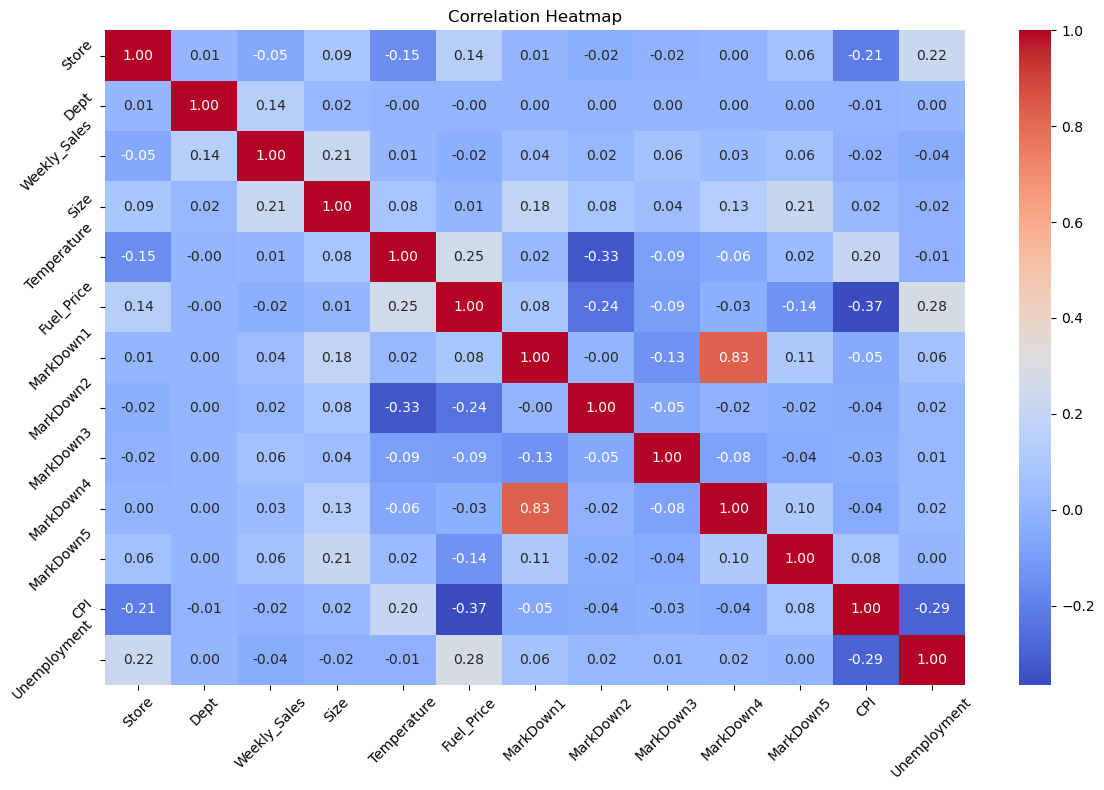

In [18]:
#Correlation heatmap
numeric_columns = train_full_merged.select_dtypes(include=['int64', 'float64']).columns
correlation = train_full_merged[numeric_columns].corr()

# Create a heatmap (adjust the figure size based on number of features)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()
